In [1]:
cd '/Users/alclark/Documents/GitHub/Matplotlib-for-Storytellers/figures/poetryplots' 

/Users/alclark/Documents/GitHub/Matplotlib-for-Storytellers/figures/poetryplots


In [2]:
import nbformat

In [3]:
def savepy(filename, source: str = None, cell_no: int = None):
    '''
    Save python file from string. Assumes the working directory is the root project folder.
    '''
    filename = filename + '.py'
    path = '../../python/'

    current_cell = get_ipython().execution_count
    
    if source is None:
        if cell_no is None:
            cell_no = current_cell - 2 # - 1 for 0-based -1 again for previous
            #raise Exception("need source or cell number.")
        # get cell source
        tmp = nbformat.read(path + 'Poetry-Figure-Dev.ipynb', as_version=4)
        cell = tmp.cells[cell_no]
        source = cell['source']
        
        # truncate source
        trunc_word = '#truncate'
        if trunc_word in source:
            source = source[:source.index(trunc_word)]
            
        # strip white space
        lines = source.splitlines()
        for i in range(len(lines)):
            lines[i] = lines[i].rstrip()
        source = '\n'.join(lines)
        
    with open(path + filename, 'w') as f:
        f.write(source)

In [4]:
# %load ../../python/imports.py
import numpy as np
import pandas as pd
import math
from itertools import combinations
from itertools import product
from sklearn.datasets import load_iris

# matplotlib specific
import matplotlib as mpl
import matplotlib.pyplot as plt

# For Special Topics
# import ternary # requires install
# from ternary.helpers import simplex_iterator
from sklearn.manifold import MDS
from sklearn.decomposition import PCA
from scipy import stats

# Made redundant in the text
from matplotlib.patches import ConnectionPatch
from matplotlib.patches import Rectangle
import matplotlib.gridspec as gridspec
from matplotlib.ticker import MultipleLocator
from matplotlib.colors import colorConverter
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import matplotlib.dates as mdates
from matplotlib import font_manager

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


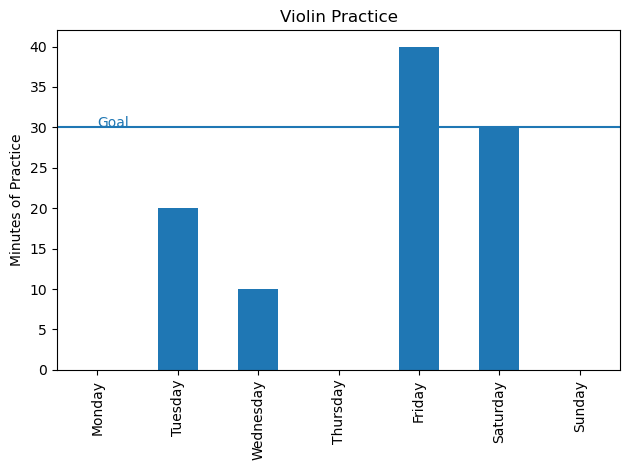

In [5]:
violin_practice = {'Monday': 0,
                'Tuesday': 20,
                'Wednesday': 10,
                'Thursday': 0,
                'Friday': 40,
                'Saturday': 30,
                'Sunday': 0}

pd.Series(violin_practice).plot.bar()
plt.axhline(30)
plt.ylabel('Minutes of Practice')
plt.text(0, 30, 'Goal', color = 'C0')
plt.title('Violin Practice')
#truncate
plt.tight_layout()
plt.savefig("violin-bar.pdf")

In [6]:
savepy('violin-bar')

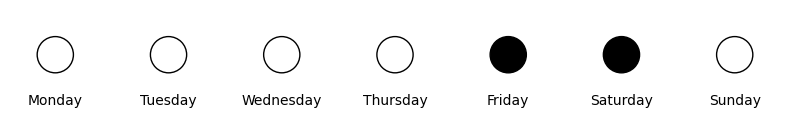

In [7]:
fig, ax = plt.figure(figsize = (8,5)), plt.axes()
spacing_scale = 2.5

for idx, day in enumerate(violin_practice):
    hit_target = violin_practice[day] >= 30

    facecolor = 'black' if hit_target else 'white'
    c = plt.Circle((idx*spacing_scale, 1),
                   radius = .4, 
                   facecolor = facecolor,
                   edgecolor = 'black')
    ax.add_artist(c)
    ax.text(idx*spacing_scale, 0,
            s = day,
            ha = 'center',
            va = 'center')

# Eliminate Clutter 
ax.set_aspect('equal')
ax.axis('off')

# Set plot window
ax.set_xlim([-1, 6*spacing_scale+1])
ax.set_ylim([0, 2])
#truncate
plt.tight_layout()
plt.savefig("violin-cal.pdf")

In [8]:
savepy('violin-cal')

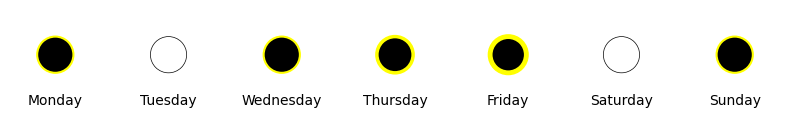

In [9]:
violin_practice = {'Monday': 30,
                   'Tuesday': 0,
                   'Wednesday': 30,
                   'Thursday': 30,
                   'Friday': 40,
                   'Saturday': 0,
                   'Sunday': 60}

fig, ax = plt.figure(figsize = (8,5)), plt.axes()
spacing_scale = 2.5

streak = 0
for idx, day in enumerate(violin_practice):
    
    hit_target = violin_practice[day] >= 30
    streak += 1*hit_target
    streak = streak if hit_target else 0
    
    facecolor = 'black' if hit_target else 'white'
    edgecolor = 'yellow' if hit_target else 'black'
    c = plt.Circle((idx*spacing_scale,1),
                   radius = .4, 
                   facecolor = facecolor, 
                   edgecolor = edgecolor, 
                   linewidth = 0.5 + streak)
    ax.add_artist(c)
    ax.text(idx*spacing_scale, 0,
            s = day, 
            ha = 'center',
            va = 'center')

# Eliminate Clutter 
ax.set_aspect('equal')
ax.axis('off')

# Set plot window
ax.set_xlim([-1, 6*spacing_scale+1])
ax.set_ylim([0, 2])
#truncate
plt.tight_layout()
plt.savefig("violin-streak.pdf")

In [10]:
savepy('violin-streak')